In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install plotly

In [ ]:
!pip install cufflinks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [137]:
train = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv',na_values=['unknown'])
submission = pd.read_csv('../input/siim-isic-melanoma-classification/sample_submission.csv')
test = pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,NaN,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,NaN,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,NaN,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,NaN,benign,0


In [138]:
train.isnull().sum()

image_name                           0
patient_id                           0
sex                                 65
age_approx                          68
anatom_site_general_challenge      527
diagnosis                        27124
benign_malignant                     0
target                               0
dtype: int64

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      6002 non-null   object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [140]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

## Pandas-Bokeh is use full and quite handy. I previously tried to use Bokeh but because of its complexcity i gave up and started learning plotly.In this notebook i used both bokeh and plotly for comparison. Except that i have implimented stacking on the tabular data which is giving score of 0.685.

In [150]:
type(train.columns)

pandas.core.indexes.base.Index

In [153]:
lists = ['anatom_site_general_challenge']

In [154]:
# cf.set_config_file(theme = 'solar')
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

data_table = DataTable(
    columns=[TableColumn(field=Ci, title=Ci) for Ci in lists],
    source=ColumnDataSource(train),
    height=300,
)


count_anatom = train['anatom_site_general_challenge'].value_counts().plot_bokeh(kind = 'barh',color='green',title="count of location of imaged site", 
    alpha=0.6,show_figure=False)

pandas_bokeh.plot_grid([[data_table, count_anatom]], plot_width=400, plot_height=350)


Column(id='2778', ...)

In [155]:
train['benign_malignant'].value_counts().plot_bokeh(kind='bar',alpha=0.6,color= 'red',title="count of benign and malignant",ylabel='count',xlabel='benign_malignant')

Figure(id='2973', ...)

In [157]:
train['diagnosis'].value_counts().plot_bokeh(kind='bar',color ='magenta',alpha=0.6,vertical_xlabel=True,title="count of diagnosis",ylabel='count',xlabel='diagnosis')

Figure(id='3445', ...)

In [160]:
train['age_approx'].value_counts().plot_bokeh(kind='bar',color = 'blue',title="count of age_approx",vertical_xlabel=True,ylabel='count',xlabel='age_approx',alpha=0.6)

Figure(id='3690', ...)

In [164]:
train['sex'].value_counts().plot_bokeh(kind='bar',alpha=0.6,colormap=["#009933"],title="count of sex",ylabel='count',xlabel='sex')

Figure(id='4730', ...)

In [165]:
p_vs_img = train.groupby('patient_id').image_name.count().to_frame().reset_index()

In [169]:
p_vs_img_plot = p_vs_img.sort_values(by=['image_name'],ascending=False).iloc[0:50]
p_vs_img_plot.plot_bokeh(kind='bar',alpha=0.6,color="brown",title="count of top 50 patient_id",ylabel='count',xlabel='patient_id',vertical_xlabel=True)

Figure(id='5866', ...)

In [172]:

# patient_id
train['patient_id'].value_counts().plot_bokeh(kind='bar',alpha=0.6,color="blue",title="count of full patient_id",ylabel='count',xlabel='patient_id',vertical_xlabel=True,figsize=(1000, 600))

Figure(id='6781', ...)

In [173]:
(train.groupby('patient_id').image_name.count()).max()

115

In [174]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,NaN,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,NaN,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,NaN,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,NaN,benign,0


In [175]:
train.groupby(['target','sex']).count()

image_name  patient_id  age_approx  \
target sex                                          
0      female       15761       15761       15758   
       male         16716       16716       16716   
1      female         220         220         220   
       male           364         364         364   

               anatom_site_general_challenge  diagnosis  benign_malignant  
target sex                                                                 
0      female                          15529       2410             15761  
       male                            16430       3008             16716  
1      female                            217        220               220  
       male                              358        364               364

In [19]:
train.groupby(['target','anatom_site_general_challenge'])['benign_malignant'].count().iplot(kind = 'bar')

In [126]:
train.groupby(['target','sex'])['benign_malignant'].count().iplot(kind = 'bar',color='red')

In [127]:
train.groupby(['target','age_approx'])['benign_malignant'].count().iplot(kind = 'bar',color='green')

In [128]:
train.groupby(['sex','anatom_site_general_challenge'])['benign_malignant'].count().iplot(kind = 'bar',color = 'blue')

In [23]:
train.groupby(['target','diagnosis'])['benign_malignant'].count().iplot(kind = 'bar')

In [129]:
train.groupby(['sex','diagnosis'])['benign_malignant'].count().iplot(kind = 'bar',color ='magenta')

In [25]:
amount = train.groupby('anatom_site_general_challenge')['anatom_site_general_challenge'].transform('count')

In [26]:
import plotly.graph_objs as go
labels = set(train['anatom_site_general_challenge'])
labels_list = list(labels)
trace = go.Pie(values=amount,labels = labels_list,hole=0.3,pull=[0, 0, 0.2, 0])
iplot([trace])

In [27]:
train['diagnosis'].value_counts()

nevus                                 5193
melanoma                               584
seborrheic keratosis                   135
lentigo NOS                             44
lichenoid keratosis                     37
solar lentigo                            7
cafe-au-lait macule                      1
atypical melanocytic proliferation       1
Name: diagnosis, dtype: int64

In [130]:
train['diagnosis'].value_counts().iplot(kind='bar',color='yellow')

# Feature Engineering:

In [29]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,NaN,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,NaN,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,NaN,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,NaN,benign,0


### Feature Engineering:

In [30]:
numerical_features = [i for i in train.columns if train[i].dtypes != 'O']
numerical_features

['age_approx', 'target']

In [31]:
categorical_features = [i for i in train.columns if train[i].dtypes == 'O']
categorical_features

['image_name',
 'patient_id',
 'sex',
 'anatom_site_general_challenge',
 'diagnosis',
 'benign_malignant']

In [32]:
discreat_features = [i for i in numerical_features if len(train[i].unique())<25 ]
discreat_features

['age_approx', 'target']

So, we got some features which are neumerical and categorical. And from above cell it is clear that the neumerical features are discontinious.so there is no continious features.

In [33]:
import gc
gc.collect()

3952

In [34]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,NaN,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,NaN,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,NaN,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,NaN,benign,0


In [35]:
train.isnull().sum()

image_name                           0
patient_id                           0
sex                                 65
age_approx                          68
anatom_site_general_challenge      527
diagnosis                        27124
benign_malignant                     0
target                               0
dtype: int64

In [36]:
nan_features = [i for i in train.columns if train[i].isnull().sum()>=1]
nan_features

['sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis']

In [37]:
# pd.pandas.set_option('display.max_columns',None)
# pd.pandas.set_option('display.max_rows',None)

train['age_approx'] = train['age_approx'].fillna(train['age_approx'].median())
train['age_approx'].isnull().sum()

0

In [38]:
train['anatom_site_general_challenge'].mode()

0    torso
dtype: object

In [39]:
train['anatom_site_general_challenge']=train['anatom_site_general_challenge'].fillna('torso') 
train['anatom_site_general_challenge'].isnull().sum()

0

In [40]:
train['sex'] = train['sex'].fillna(str(train['sex'].mode()))
train['diagnosis'] = train['diagnosis'].fillna(str(train['diagnosis'].mode()))
train['sex'].isnull().sum()
train['diagnosis'].isnull().sum()

0

In [41]:
train.isnull().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
benign_malignant                 0
target                           0
dtype: int64

### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encod = LabelEncoder()

for i in categorical_features:
    train[i]=label_encod.fit_transform(train[i])

In [43]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,8449,1453,2,45.0,0,0,0,0
1,0,610,1,45.0,5,0,0,0
2,1,555,1,50.0,1,6,0,0
3,2,1374,1,45.0,0,0,0,0
4,3,1774,1,55.0,5,0,0,0


### Droping some columns:

In [44]:
data = train.copy()
data = data.drop(['image_name','patient_id','diagnosis','benign_malignant'],axis = 1)
data.head()

,sex,age_approx,anatom_site_general_challenge,target
0,2,45.0,0,0
1,1,45.0,5,0
2,1,50.0,1,0
3,1,45.0,0,0
4,1,55.0,5,0


### Train test split:

In [45]:
Y = data['target']
X = data.drop(['target'],axis = 1)


In [46]:
SEED = 42
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size = 0.2,random_state = SEED)

### Model Building:(RF)

In [47]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

classifier_rf = RandomForestClassifier(random_state=SEED)
rf_random = RandomizedSearchCV(estimator = classifier_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [51]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=180, random_state=42)

In [52]:
classifier_rf1 = RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=180, random_state=42)
classifier_rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=180, random_state=42)

In [58]:
y_pred = classifier_rf1.predict_proba(x_val)
type(y_pred)

numpy.ndarray

### Test data:

In [63]:
test.isnull().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
dtype: int64

In [65]:
test['anatom_site_general_challenge'] = test['anatom_site_general_challenge'].fillna(str(test['anatom_site_general_challenge'].mode())) 

In [67]:
test.isnull().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
dtype: int64

In [69]:
categorical_fea_test = [i for i in test.columns if test[i].dtypes == 'O']
for i in categorical_fea_test:
    test[i] = label_encod.fit_transform(test[i])
    
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,0,231,1,70.0,0
1,1,528,1,40.0,2
2,2,540,0,55.0,5
3,3,420,0,50.0,5
4,4,33,0,45.0,2


In [70]:
test = test.drop(['image_name','patient_id'],axis = 1)
test.head()

,sex,age_approx,anatom_site_general_challenge
0,1,70.0,0
1,1,40.0,2
2,0,55.0,5
3,0,50.0,5
4,0,45.0,2


### Evaluation:

0.6792626686451437


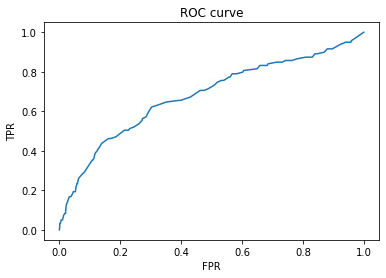

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
print(roc_auc_score(y_val, y_pred[:,1]))

fpr, tpr, _ = roc_curve(y_val, y_pred[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [81]:
y_pred

array([[1.        , 0.        ],
       [0.97093441, 0.02906559],
       [0.99425247, 0.00574753],
       ...,
       [0.98482228, 0.01517772],
       [0.97598641, 0.02401359],
       [0.9815396 , 0.0184604 ]])

In [82]:
auc_rf = auc(fpr,tpr)
print(auc_rf)

0.6792626686451437


In [85]:
y_pred_test_rf = classifier_rf1.predict_proba(test)
y_pred_test_rf[:,1].

array([0.00227586, 0.22496744, 0.01111016, ..., 0.        , 0.00645209,
       0.        ])

In [89]:
submission_main = pd.read_csv('../input/siim-isic-melanoma-classification/sample_submission.csv')

### Image prediction file: 

In [93]:
img_sub = pd.read_csv('../input/1st-featuredcom-submission-baseline-keras-vgg16/submission.csv')
img_sub.head()

,image_name,target
0,ISIC_0052060,0.015126
1,ISIC_0052349,0.012018
2,ISIC_0058510,0.017625
3,ISIC_0073313,0.016581
4,ISIC_0073502,0.764647


### Model Building:(XGB)

In [96]:
import xgboost as xgb
from scipy import stats
from scipy.stats import randint

xgb_clf = xgb.XGBClassifier()


param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
clf_xgb = RandomizedSearchCV(xgb_clf, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
clf_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.7min finished


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estima...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdbab0eaf10>,
                                        'learning

In [97]:
clf_xgb.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5791848525626986, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.47840118037023044, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=585, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.792826572247452, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [102]:
xgbo = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5791848525626986, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.47840118037023044, max_delta_step=0, max_depth=4,
              min_child_weight=4, monotone_constraints='()',
              n_estimators=585, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.792826572247452, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [103]:
xgbo.fit(x_train,y_train)
y_pred_xgb = xgbo.predict_proba(x_val)

In [106]:
print(roc_auc_score(y_val, y_pred_xgb[:,1]))


0.6791096337105612


#### So random Forest is giving me more better results than Xgboost, though the difference is slightly large.

### Stacking:

In [123]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import DecisionTreeClassifier

base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=100, random_state=SEED)),
                 ('adb',AdaBoostClassifier(n_estimators=100, random_state=SEED)),
                 ('ext',ExtraTreesClassifier(n_estimators=100, random_state=SEED)),
                 ('gbc',GradientBoostingClassifier(n_estimators=100,random_state=SEED)),
                 ('svc', SVC())
    
    
                ]

# Initialize Stacking Classifier with the Meta Learner
stk_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stk_clf.fit(x_train, y_train)

StackingClassifier(estimators=[('rf_1',
                                RandomForestClassifier(random_state=42)),
                               ('adb',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42)),
                               ('ext', ExtraTreesClassifier(random_state=42)),
                               ('gbc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [124]:
y_pred_stk = stk_clf.predict_proba(x_val)

In [125]:
print(roc_auc_score(y_val, y_pred_stk[:,1]))


0.6854163518796177


#### So stacking is producing far more better result than, normal xgboost or random forest. And it is found that we are getting same score with and without SVC.

In [132]:
!pip install -U pandas_bokeh

In [133]:
import pandas_bokeh
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [136]:
train['anatom_site_general_challenge'].value_counts().plot_bokeh(kind='barh')

Figure(id='1171', ...)